In [538]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [539]:
n = 10

In [540]:
### Discretize my x
x = np.linspace(0,1,num=n+1)

In [541]:
h = 1/n

In [542]:
def f(x):
    return 6*x - 2

In [543]:
def analytical(x):
    return x**2 - x**3

## 1d Linear FEM

In [308]:
def get_linear_coeff(i,j):
    if i==j:
        return 1/h
    return -1/h

In [309]:
A = np.zeros((n-1,n-1))
for k in range(0,n+1):
    for i in [0,1]:
        for j in [0,1]:
            ig = k+i-2
            jg= k+j-2
            if ig < 0 or jg < 0 or ig >=n-1 or jg >=n-1:
                continue
            print(ig,jg)
            print(get_linear_coeff(i,j))
            A[ig,jg] = A[ig,jg] + get_linear_coeff(i,j)
    print(A)
    print("---------|")

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
---------|
0 0
10.0
[[10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
---------|
0 0
10.0
0 1
-10.0
1 0
-10.0
1 1
10.0
[[ 20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  10.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0

In [310]:
f_disc = np.zeros(n-1)
for i in range(1,n):
    f_disc[i-1] = h*f(x[i])

In [311]:
u = np.linalg.solve(A, f_disc)

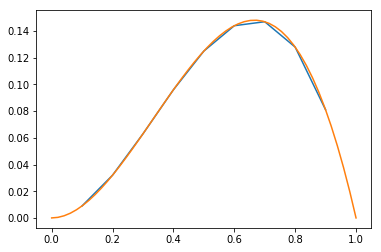

In [312]:
plt.plot(x[1:-1],u)
# As a comparison we plot the exact solution in the same graph
x = np.linspace(0,1)
plt.plot(x, x**2 - x**3)

## 1d Quadratic FEM

In [548]:
def fem1d_bvp_quadratic ( n, a, c, f, x ):

  quad_num = 3
  abscissa = np.array ( [ \
    -0.774596669241483377035853079956, \
     0.000000000000000000000000000000, \
     0.774596669241483377035853079956 ] )
  weight = np.array ( [ \
    0.555555555555555555555555555556, \
    0.888888888888888888888888888889, \
    0.555555555555555555555555555556 ] )
#
#  Make room for the matrix A and right hand side b.
#
  A = np.zeros ( [ n, n ] )
  b = np.zeros ( n )
#
#  Integrate over element E.
#
  e_num = ( n - 1 ) // 2

  for e in range ( 0, e_num ):

    l = 2 * e
    xl = x[l]

    m = 2 * e + 1
    xm = x[m]

    r = 2 * e + 2
    xr = x[r]

    for q in range ( 0, quad_num ):

      xq = ( ( 1.0 - abscissa[q] ) * xl   \
           + ( 1.0 + abscissa[q] ) * xr ) \
           / 2.0

      wq = weight[q] * ( xr - xl ) / 2.0

      axq = a ( xq )
      cxq = c ( xq )
      fxq = f ( xq )

      vl = ( ( xq - xm ) / ( xl - xm ) ) \
         * ( ( xq - xr ) / ( xl - xr ) )

      vm = ( ( xq - xl ) / ( xm - xl ) ) \
         * ( ( xq - xr ) / ( xm - xr ) )

      vr = ( ( xq - xl ) / ( xr - xl ) ) \
         * ( ( xq - xm ) / ( xr - xm ) )

      vlp = (         1.0 / ( xl - xm ) ) \
          * ( ( xq - xr ) / ( xl - xr ) ) \
          + ( ( xq - xm ) / ( xl - xm ) ) \
          * (         1.0 / ( xl - xr ) )

      vmp = (         1.0 / ( xm - xl ) ) \
          * ( ( xq - xr ) / ( xm - xr ) ) \
          + ( ( xq - xl ) / ( xm - xl ) ) \
          * (         1.0 / ( xm - xr ) )

      vrp = (         1.0 / ( xr - xl ) ) \
          * ( ( xq - xm ) / ( xr - xm ) ) \
          + ( ( xq - xl ) / ( xr - xl ) ) \
          * (         1.0 / ( xr - xm ) )

      A[l,l] = A[l,l] + wq * ( vlp * axq * vlp + vl * cxq * vl )
      A[l,m] = A[l,m] + wq * ( vlp * axq * vmp + vl * cxq * vm )
      A[l,r] = A[l,r] + wq * ( vlp * axq * vrp + vl * cxq * vr )
      b[l]   = b[l]   + wq * ( vl * fxq )

      A[m,l] = A[m,l] + wq * ( vmp * axq * vlp + vm * cxq * vl )
      A[m,m] = A[m,m] + wq * ( vmp * axq * vmp + vm * cxq * vm )
      A[m,r] = A[m,r] + wq * ( vmp * axq * vrp + vm * cxq * vr )
      b[m] =   b[m]   + wq * ( vm * fxq )

      A[r,l] = A[r,l] + wq * ( vrp * axq * vlp + vr * cxq * vl )
      A[r,m] = A[r,m] + wq * ( vrp * axq * vmp + vr * cxq * vm )
      A[r,r] = A[r,r] + wq * ( vrp * axq * vrp + vr * cxq * vr )
      b[r] =   b[r]   + wq * ( vr * fxq )
#
#  Equation 0 is the left boundary condition, U(0) = 0.0;
#
  for j in range ( 0, n ):
    A[0,j] = 0.0
  A[0,0] = 1.0
  b[0] = 0.0
#
#  We can keep the matrix symmetric by using the boundary condition
#  to eliminate U(0) from all equations but #0.
#
  for i in range ( 1, n ):
    b[i] = b[i] - A[i,0] * b[0]
    A[i,0] = 0.0
#
#  Equation N-1 is the right boundary condition, U(N-1) = 0.0;
#
  for j in range ( 0, n ):
    A[n-1,j] = 0.0
  A[n-1,n-1] = 1.0
  b[n-1] = 0.0
#
#  We can keep the matrix symmetric by using the boundary condition
#  to eliminate U(N-1) from all equations but #N-1.
#
  for i in range ( 0, n - 1 ):
    b[i] = b[i] - A[i,n-1] * b[n-1]
    A[i,n-1] = 0.0
#
#  Solve the linear system for the finite element coefficients U.
#
    u = np.linalg.solve(A,b)
    return u
 

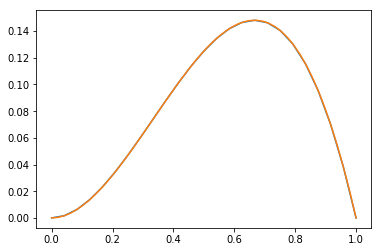

In [557]:
def fem1d_bvp_quadratic_test00 ( ):
    x_lo = 0.0
    x_hi = 1.0
    x = np.linspace ( x_lo, x_hi, 25)

    u = fem1d_bvp_quadratic ( n, a00, c00, f, x )

    fig = plt.figure ( )
    plt.plot ( x, u)
    x_new = np.linspace(0,1)
    plt.plot(x_new, analytical(x_new))

    return

def a00 ( x ):
    value = 1.0
    return value

def c00 ( x ):
    return 0

fem1d_bvp_quadratic_test00 ( )

